# Bar Chart

This section showcases the bar chart. It contains examples of how to create the bar chart using the [datachart.charts.BarChart](/references/charts#datachart.charts.BarChart) function.

The examples sequentially build on each other, going from simple to complex.

As mentioned above, the bar charts are created using the `BarChart` function found in the [datachart.charts](datachart.charts) module. Let's import it:

In [1]:
from datachart.charts import BarChart

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>BarChart</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>BarChart</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>

## Bar Chart Input Attributes

The `BarChart` function accepts keyword arguments for chart configuration. The main argument is `data`, which contains the data points. For a single bar chart, `data` is a list of dictionaries. For multiple bar charts, `data` is a list of lists.

```python
BarChart(
    data=[{                                             # A list of bar data points (or list of lists for multiple charts)
        "label": str,                                   # The x-axis value
        "y":     Union[int, float],                     # The y-axis value
        "yerr":  Optional[Union[int, float]]            # The y-axis error value
    }],
    style={                                             # The style of the bar (optional)
        "plot_bar_color":       Union[str, None],       # The color of the bar
        "plot_bar_alpha":       Union[float, None],     # The alpha of the bar
        "plot_bar_width":       Union[int, float, None], # The width of the bar
        "plot_bar_zorder":      Union[int, float, None], # The z-order of the bar
        "plot_bar_hatch":       Union[HATCH_STYLE, None], # The hatch style of the bar
        "plot_bar_edge_width":  Union[int, float, None], # The edge line width of the edge
        "plot_bar_edge_color":  Union[str, None],       # The edge line color
        "plot_bar_error_color": Union[str, None],       # The error line color
        "plot_bar_value_fontsize": Union[int, float, None], # The font size of bar value labels
        "plot_bar_value_color": Union[str, None],       # The color of bar value labels
        "plot_bar_value_padding": Union[int, float, None], # The padding between bar and value label
    },
    subtitle=Optional[str],                             # The subtitle of the chart (or list for multiple charts)
    title=Optional[str],                                # The title of the chart
    xlabel=Optional[str],                               # The x-axis label
    ylabel=Optional[str],                               # The y-axis label

    show_values=Optional[bool],                         # Whether to show bar value labels
    value_format=Optional[str],                         # Format string for value labels (e.g., "{:.1f}%")

    xticks=Optional[List[Union[int, float]]],           # the x-axis ticks
    xticklabels=Optional[List[str]],                    # the x-axis tick labels (must be same length as xticks)
    xtickrotate=Optional[int],                          # the x-axis tick labels rotation
    yticks=Optional[List[Union[int, float]]],           # the y-axis ticks
    yticklabels=Optional[List[str]],                    # the y-axis tick labels (must be same length as yticks)
    ytickrotate=Optional[int],                          # the y-axis tick labels rotation

    vlines=Optional[Union[dict, List[dict]]],           # the vertical lines
    hlines=Optional[Union[dict, List[dict]]],           # the horizontal lines
)
```

For more details, see the [datachart.typings.BarChartAttrs](/references/typings/#datachart.typings.BarChartAttrs) type.

## Single Bar Chart

In this part, we show how to create a single bar chart using the `BarChart` function. 

Let us first import the necessary libraries:

In [2]:
import random

**Basic example.** Let us first create a basic bar chart showing a random distribution. 

The following example shows how only the `data` argument is required to draw the bar chart.

In [3]:
NUM_OF_POINTS = 10

In [4]:
chart_data = [
    {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
    for id in range(NUM_OF_POINTS)
]

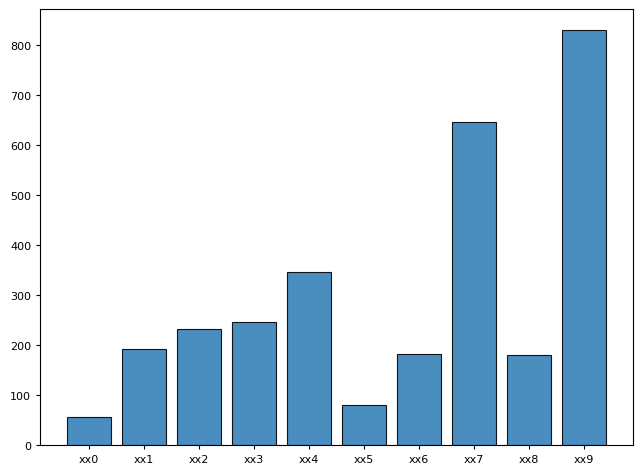

In [5]:
_ = BarChart(
    # add the data to the chart
    data=chart_data
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.

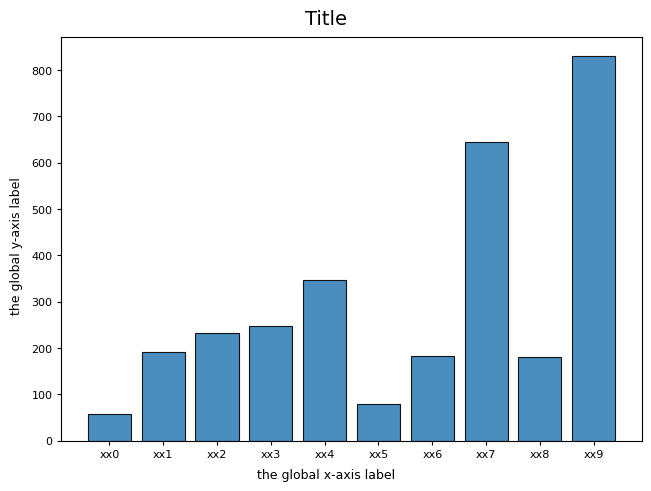

In [6]:
_ = BarChart(
    data=chart_data,
    # add the title
    title="Title",
    # add the x and y axis labels
    xlabel="the global x-axis label",
    ylabel="the global y-axis label"
)

### Figure size and grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

To add the grid, simply add the `show_grid` attribute. The possible options are:

| Option | Description |
| --- | --- |
| `"both"` | shows both the x-axis and the y-axis gridlines. |
| `"x"` | shows only the x-axis grid lines. |
| `"y"` | shows only the y-axis grid lines. |

Again, `datachart` provides a [datachart.constants.SHOW_GRID](/references/constants/#datachart.constants.SHOW_GRID) constant, which contains the supported options.

In [7]:
from datachart.constants import FIG_SIZE, SHOW_GRID

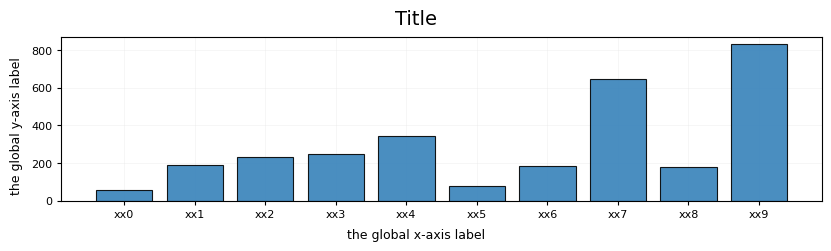

In [8]:
_ = BarChart(
    data=chart_data,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    # add to determine the figure size
    figsize=FIG_SIZE.A4_NARROW,
    # add to show the grid lines
    show_grid=SHOW_GRID.BOTH
)

### Bar style

To change a single bar style simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.BarStyleAttrs](/references/typings/#datachart.typings.BarStyleAttrs) type, which contains the following attributes:

| Attribute | Description |
| :-------- | :---------- |
| `"plot_bar_color"`       | The color of the bar (hex color code). |
| `"plot_bar_alpha"`       | The alpha of the bar (how visible the bar is). |
| `"plot_bar_width"`       | The width of the bar. |
| `"plot_bar_zorder"`      | The zorder of the bar. |
| `"plot_bar_hatch"`       | The hatch style of the bar. |
| `"plot_bar_edge_width"`  | The edge line width of the edge. |
| `"plot_bar_edge_color"`  | The edge line color (hex color code). |
| `"plot_bar_error_color"` | The error line color (hex color code). |
| `"plot_bar_value_fontsize"` | The font size of bar value labels. |
| `"plot_bar_value_color"` | The color of bar value labels (hex color code). |
| `"plot_bar_value_padding"` | The padding between bar edge and value label. |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.HATCH_STYLE](/references/constants/#datachart.constants.HATCH_STYLE) | The hatch style of the bar. |


In [9]:
from datachart.constants import HATCH_STYLE

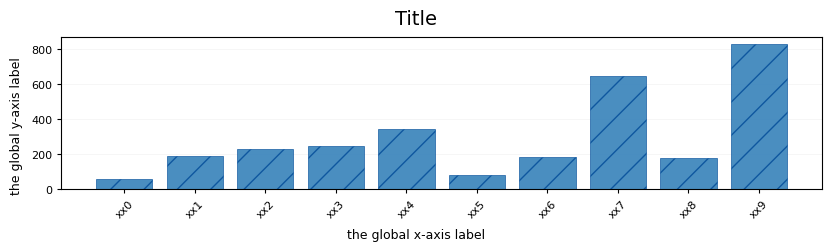

In [10]:
_ = BarChart(
    data=chart_data,
    # define the style of the bars
    style={
        "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
        "plot_bar_edge_width": 0.5,
        "plot_bar_edge_color": "#08519c",
    },
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    xtickrotate=45,
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
)

### Bar orientation

To change the orientation of the bars, simply add the `orientation` attribute, which supports the following values:

| Value | Description |
| :---- | :---------- |
| `"horizontal"` | The bars are horizontal. |
| `"vertical"` | The bars are vertical. |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.ORIENTATION](/references/constants/#datachart.constants.ORIENTATION) | The orientation of the bars. |

In [11]:
from datachart.constants import ORIENTATION

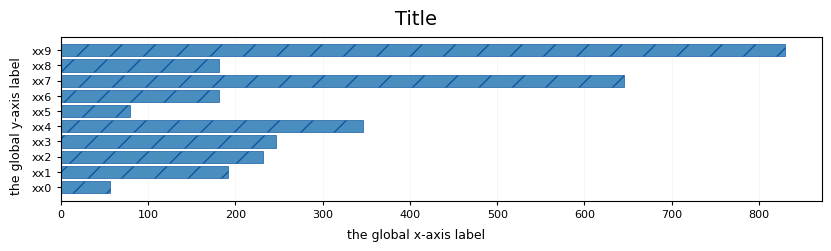

In [12]:
_ = BarChart(
    data=chart_data,
    style={
        "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
        "plot_bar_edge_width": 0.5,
        "plot_bar_edge_color": "#08519c",
    },
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    # change the grid to match the change in orientation
    show_grid=SHOW_GRID.X,
    # change the orientation of the bars
    orientation=ORIENTATION.HORIZONTAL,
)

### Adding vertical and horizontal lines

**Adding vertical lines.** Use the `vlines` argument with the [datachart.typings.VLinePlotAttrs](/references/typings/#datachart.typings.VLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                 # The x-axis value (values are bar indices, e.g. 0, 1, 2, etc.)
  "ymin": Optional[Union[int, float]],       # The minimum y-axis value
  "ymax": Optional[Union[int, float]],       # The maximum y-axis value
  "style": {                                 # The style of the line (optional)
    "plot_vline_color": Optional[str],       # The color of the line (hex color code)
    "plot_vline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_vline_width": Optional[float],     # The width of the line
    "plot_vline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```

**Adding horizontal lines.** Use the `hlines` argument with the [datachart.typings.HLinePlotAttrs](/references/typings/#datachart.typings.HLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                 # The y-axis value
  "xmin": Optional[Union[int, float]],       # The minimum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "xmax": Optional[Union[int, float]],       # The maximum x-axis value  (values are bar indices, e.g. 0, 1, 2, etc.)
  "style": {                                 # The style of the line (optional)
    "plot_hline_color": Optional[str],       # The color of the line (hex color code)
    "plot_hline_style": Optional[LineStyle], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],     # The width of the line
    "plot_hline_alpha": Optional[float],     # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                    # The label of the line
}
```


To add vertical and horizontal lines, simply add the `vlines` and `hlines` arguments.

In [13]:
from datachart.constants import LINE_STYLE

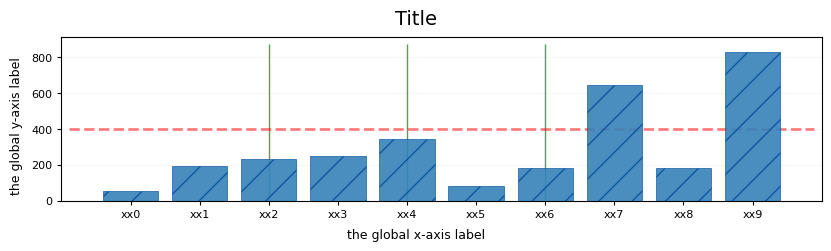

In [14]:
_ = BarChart(
    data=chart_data,
    style={
        "plot_bar_hatch": HATCH_STYLE.DIAGONAL,
        "plot_bar_edge_width": 0.5,
        "plot_bar_edge_color": "#08519c",
    },
    # add a list of vertical lines
    vlines=[
        {
            "x": 2 * i,
            "style": {
                "plot_vline_color": "green",
                "plot_vline_style": LINE_STYLE.SOLID,
                "plot_vline_width": 1,
            },
        }
        for i in range(1, 4)
    ],
    # add a list of horizontal lines
    hlines={
        "y": 400,
        "style": {
            "plot_hline_color": "red",
            "plot_hline_style": LINE_STYLE.DASHED,
            "plot_hline_width": 2,
            "plot_hline_alpha": 0.5,
        },
    },
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    xmin=-1,
    xmax=10
)

## Multiple Bar Charts

To create multiple bar charts, pass a list of lists to the `data` argument. Each inner list represents the data for one chart. Per-chart attributes like `subtitle` and `style` can be passed as lists, where each element corresponds to a chart.

<div class="admonition note">
    <p class="admonition-title">Multiple charts pattern</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        For multiple charts, <code>data</code> becomes a list of lists, and per-chart attributes like <code>subtitle</code> and <code>style</code> become lists where each element applies to the corresponding chart.
    </p>
</div>

In [15]:
# the data is now a list of lists (one per chart)
multi_chart_data = [
    [
        {"label": f"xx{id}", "y": 100 * (id + 1) * random.random()}
        for id in range(NUM_OF_POINTS)
    ]
    for _ in range(2)
]

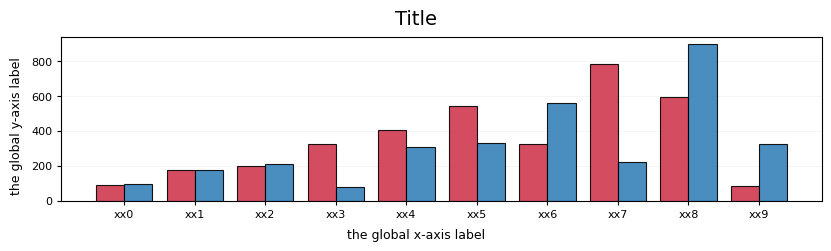

In [16]:
_ = BarChart(
    # use a list of lists to define multiple bar charts
    data=multi_chart_data,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
)

### Sub-chart subtitles

We can name each chart by passing a list of subtitles to the `subtitle` argument. In addition, to help with discerning which chart is which, use the `show_legend` argument to show the legend of the charts.

In [17]:
# define subtitles for each chart
chart_subtitles = [f"Bars {idx+1}" for idx in range(len(multi_chart_data))]

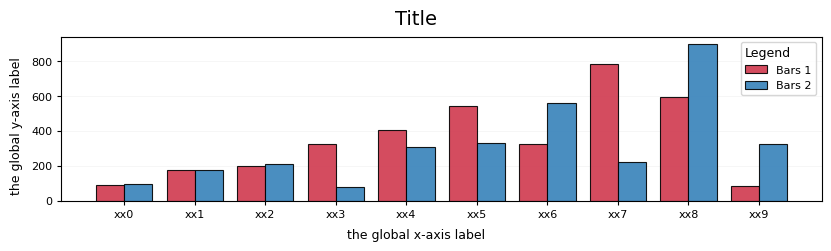

In [18]:
_ = BarChart(
    data=multi_chart_data,
    # add a subtitle to each chart
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    # show the legend
    show_legend=True,
)

### Subplots

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart's `subtitle` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be global for all charts.

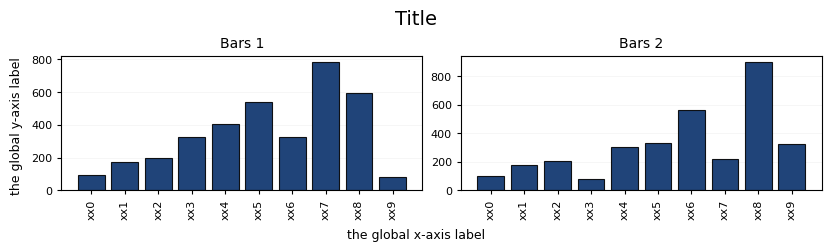

In [19]:
_ = BarChart(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    # show each chart in its own subplot
    subplots=True,
)

### Sharing the x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes, which are boolean values that specify whether to share the axis across all subplots.

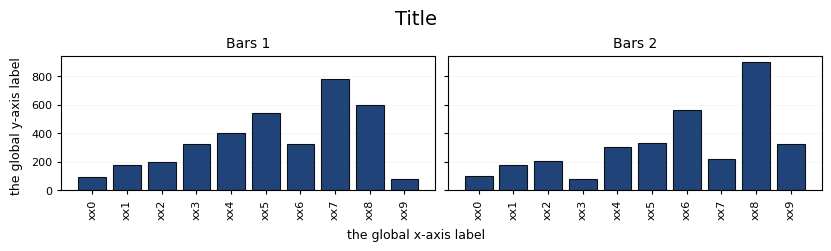

In [20]:
_ = BarChart(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    subplots=True,
    # share the x-axis across subplots
    sharex=True,
    # share the y-axis across subplots
    sharey=True,
)

### Subplot orientation

The `orientation` attribute can be used to change the orientation of all subplots.

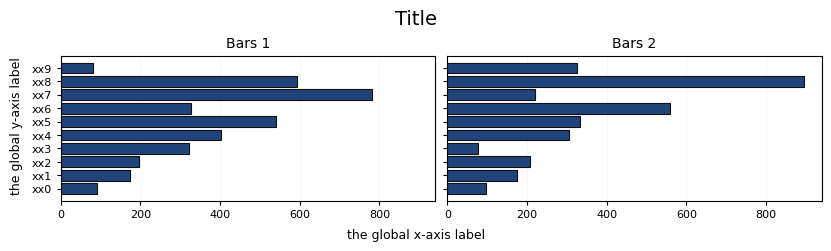

In [21]:
_ = BarChart(
    data=multi_chart_data,
    subtitle=chart_subtitles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    subplots=True,
    sharex=True,
    sharey=True,
    # change the grid to match the change in orientation
    show_grid=SHOW_GRID.X,
    # change the orientation of the bars
    orientation=ORIENTATION.HORIZONTAL,
)

## Additional Features

### Error bars

To add error bars to each bar chart, first define the `yerr` in the `data` attribute. Afterwards, add the `show_yerr` attribute.

In [22]:
# add error values to the data for error bars
multi_chart_data_with_err = [
    [{**d, "yerr": 50 * random.random()} for d in chart]
    for chart in multi_chart_data
]
# define style with error bar color
chart_styles = [{"plot_bar_error_color": "#000000"} for _ in multi_chart_data]

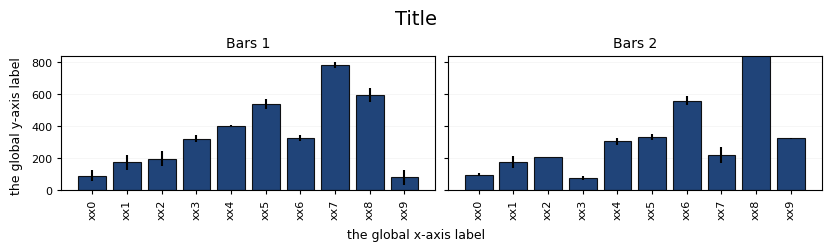

In [23]:
_ = BarChart(
    data=multi_chart_data_with_err,
    subtitle=chart_subtitles,
    style=chart_styles,
    title="Title",
    xlabel="the global x-axis label",
    ylabel="the global y-axis label",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    subplots=True,
    sharex=True,
    sharey=True,
    # show the error bars
    show_yerr=True,
    # make sure the y-axis starts at 0
    ymin=0,
)

### Bar value labels

To display the actual value at the edge of each bar, use the `show_values` parameter. You can customize the format of the displayed values using the `value_format` parameter, which accepts a Python format string (e.g., `"{:.1f}"` for one decimal place, `"{:.0f}%"` for percentage display).


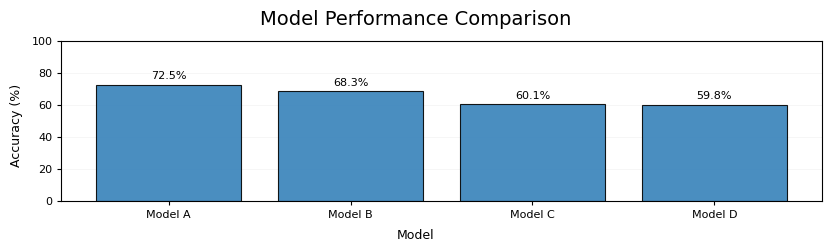

In [24]:
# Sample data for bar value labels demonstration
value_label_data = [
    {"label": "Model A", "y": 72.5},
    {"label": "Model B", "y": 68.3},
    {"label": "Model C", "y": 60.1},
    {"label": "Model D", "y": 59.8},
]

_ = BarChart(
    data=value_label_data,
    title="Model Performance Comparison",
    xlabel="Model",
    ylabel="Accuracy (%)",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.Y,
    ymin=0,
    ymax=100,
    # show bar value labels
    show_values=True,
    # format the values as percentages with one decimal place
    value_format="{:.1f}%",
)


Bar value labels also work with horizontal bar charts. You can customize the label appearance using style attributes like `plot_bar_value_fontsize`, `plot_bar_value_color`, and `plot_bar_value_padding`.


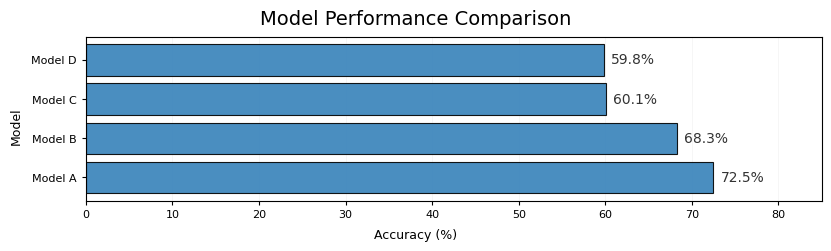

In [25]:
_ = BarChart(
    data=value_label_data,
    style={
        "plot_bar_value_fontsize": 10,
        "plot_bar_value_color": "#333333",
        "plot_bar_value_padding": 5,
    },
    title="Model Performance Comparison",
    xlabel="Accuracy (%)",
    ylabel="Model",
    figsize=FIG_SIZE.A4_NARROW,
    show_grid=SHOW_GRID.X,
    xmin=0,
    xmax=85,
    # horizontal orientation
    orientation=ORIENTATION.HORIZONTAL,
    # show bar value labels
    show_values=True,
    value_format="{:.1f}%",
)


### Axis scales

The user can change the axis scale using the `scaley` attributes. The supported scale options are:

| Options      | Description |
| :----------- | :---------- |
| `"linear"`   | The linear scale.              |
| `"log"`      | The log scale.                 |
| `"symlog"`   | The symmetric log scale.       |
| `"asinh"`    | The asinh scale.               |


Again, to help with the options settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant        | Description |
| :-------------- | :---------- |
| [datachart.constants.SCALE](/references/constants/#datachart.constants.SCALE) | The axis options. |

In [26]:
from datachart.constants import SCALE

In [27]:
# remove error values for scale demonstration
multi_chart_data_no_err = [
    [{"label": d["label"], "y": d["y"]} for d in chart]
    for chart in multi_chart_data_with_err
]

To showcase the supported scales, we iterate through all of the scales options.

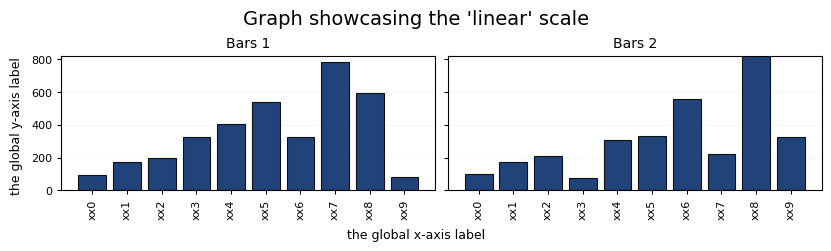

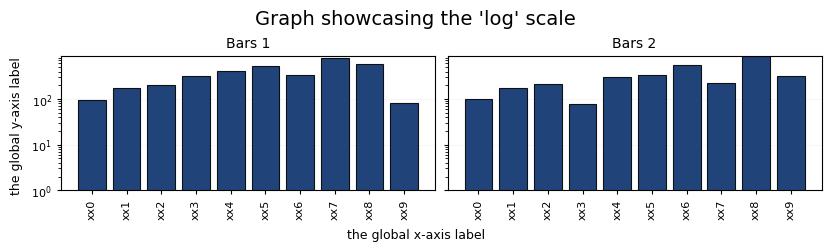

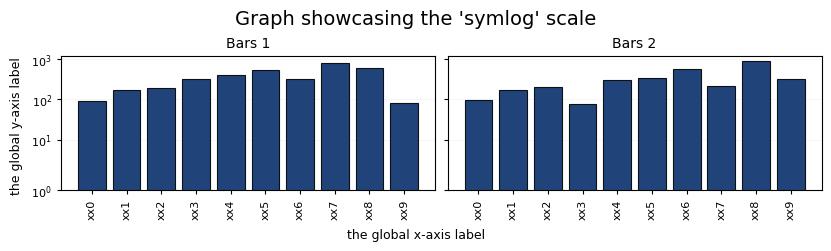

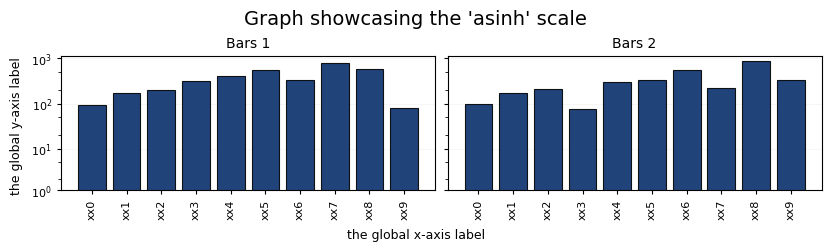

In [28]:
for scale in [SCALE.LINEAR, SCALE.LOG, SCALE.SYMLOG, SCALE.ASINH]:
    figure = BarChart(
        data=multi_chart_data_no_err,
        subtitle=chart_subtitles,
        title=f"Graph showcasing the '{scale}' scale",
        xlabel="the global x-axis label",
        ylabel="the global y-axis label",
        figsize=FIG_SIZE.A4_NARROW,
        show_grid=SHOW_GRID.Y,
        subplots=True,
        sharex=True,
        sharey=True,
        ymin=1 if scale in [SCALE.LOG, SCALE.SYMLOG, SCALE.ASINH] else 0,
        # set the scale of the y axis
        scaley=scale,
    )

## Saving the Chart as an Image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.

In [29]:
from datachart.utils import save_figure

In [30]:
save_figure(figure, "./fig_bar_chart.png", dpi=300)

The figure should be saved in the current working directory.

## Real-World Examples

The following examples demonstrate how to create various types of grouped bar charts commonly seen in data visualization.

### Example 1: Multi-Series Grouped Bar Chart

This example shows how to create a grouped bar chart with multiple series, each with a different color from a warm color palette.

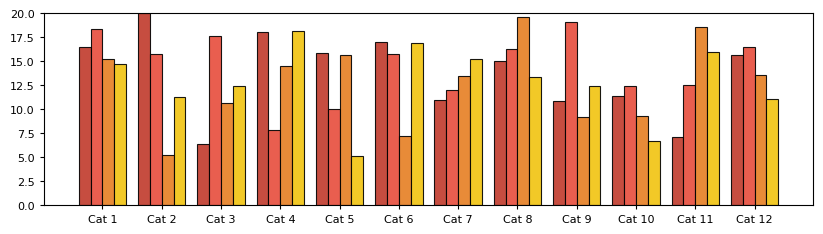

In [31]:
# Generate sample data for 4 series across 12 categories
categories = [f"Cat {i+1}" for i in range(12)]
series_data = [
    [{"label": cat, "y": 5 + random.random() * 15} for cat in categories]
    for _ in range(4)
]

# Create a grouped bar chart with warm colors
_ = BarChart(
    data=series_data,
    style=[
        {"plot_bar_color": "#c0392b"},  # Dark red
        {"plot_bar_color": "#e74c3c"},  # Red
        {"plot_bar_color": "#e67e22"},  # Orange
        {"plot_bar_color": "#f1c40f"},  # Yellow
    ],
    figsize=FIG_SIZE.A4_NARROW,
    ymin=0,
    ymax=20,
)

### Example 2: Students by Group (Two Series with Legend)

This example demonstrates a common use case: comparing two categories (Girls vs Boys) across different groups with a legend.

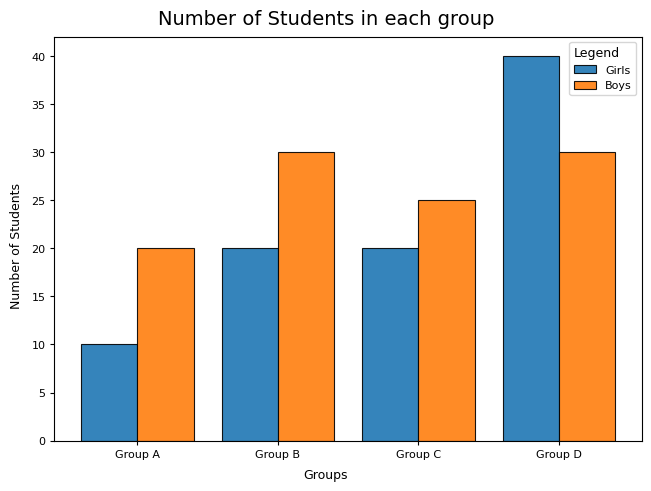

In [32]:
# Data for students by group
girls_data = [
    {"label": "Group A", "y": 10},
    {"label": "Group B", "y": 20},
    {"label": "Group C", "y": 20},
    {"label": "Group D", "y": 40},
]
boys_data = [
    {"label": "Group A", "y": 20},
    {"label": "Group B", "y": 30},
    {"label": "Group C", "y": 25},
    {"label": "Group D", "y": 30},
]

_ = BarChart(
    data=[girls_data, boys_data],
    style=[
        {"plot_bar_color": "#1f77b4"},  # Blue for Girls
        {"plot_bar_color": "#ff7f0e"},  # Orange for Boys
    ],
    title="Number of Students in each group",
    xlabel="Groups",
    ylabel="Number of Students",
    show_legend=True,
    subtitle=["Girls", "Boys"],
)

### Example 3: Vegetables Sold (Three Series with Legend)

This example shows sales data across multiple days, a common pattern for time-based comparisons.

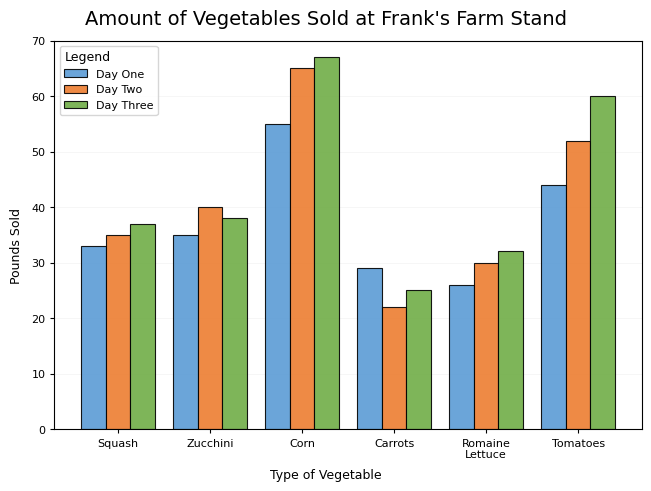

In [33]:
# Vegetables sold data
vegetables = ["Squash", "Zucchini", "Corn", "Carrots", "Romaine\nLettuce", "Tomatoes"]

day_one = [{"label": v, "y": y} for v, y in zip(vegetables, [33, 35, 55, 29, 26, 44])]
day_two = [{"label": v, "y": y} for v, y in zip(vegetables, [35, 40, 65, 22, 30, 52])]
day_three = [{"label": v, "y": y} for v, y in zip(vegetables, [37, 38, 67, 25, 32, 60])]

_ = BarChart(
    data=[day_one, day_two, day_three],
    style=[
        {"plot_bar_color": "#5b9bd5"},  # Light blue
        {"plot_bar_color": "#ed7d31"},  # Orange
        {"plot_bar_color": "#70ad47"},  # Green
    ],
    title="Amount of Vegetables Sold at Frank's Farm Stand",
    xlabel="Type of Vegetable",
    ylabel="Pounds Sold",
    show_legend=True,
    subtitle=["Day One", "Day Two", "Day Three"],
    show_grid=SHOW_GRID.Y,
    ymin=0,
    ymax=70,
)

### Example 4: Diverging Bar Chart (Positive/Negative Values)

This example demonstrates how to create a diverging bar chart where positive and negative values are displayed with different colors. Since `BarChart` applies a single color per series, we split the data into two series: one for positive values and one for negative values.

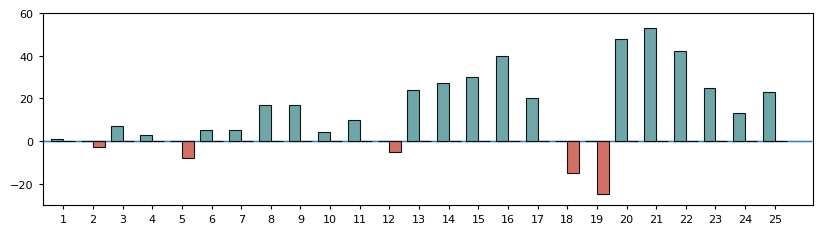

In [34]:

# Sample data with positive and negative values
values = [1, -3, 7, 3, -8, 5, 5, 17, 17, 4, 10, -5, 24, 27, 30, 40, 20, -15, -25, 48, 53, 42, 25, 13, 23]
labels = [str(i + 1) for i in range(len(values))]

# Split into positive and negative series
positive_data = [{"label": l, "y": v if v > 0 else 0} for l, v in zip(labels, values)]
negative_data = [{"label": l, "y": v if v < 0 else 0} for l, v in zip(labels, values)]

_ = BarChart(
    data=[positive_data, negative_data],
    style=[
        {"plot_bar_color": "#5f9ea0"},  # Teal for positive
        {"plot_bar_color": "#cd6155"},  # Coral for negative
    ],
    figsize=FIG_SIZE.A4_NARROW,
    hlines={
        "y": 0,
        "style": {
            "plot_vline_color": "black",
            "plot_vline_style": LINE_STYLE.SOLID,
            "plot_vline_width": 1,
        },
    },
    ymin=-30,
    ymax=60,
    xmin=-0.5, # to reduce the width of the chart
    xmax=25.5, # to reduce the width of the chart
)

<div class="admonition tip">
    <p class="admonition-title">Tip: Diverging Bar Charts</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        The workaround above splits the data into two series (positive and negative) to achieve different colors. The bars will overlap at zero since both series share the same x-positions, creating the visual effect of a single diverging bar chart.
    </p>
</div>